In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

# ___Multi Class Classification___
---------

In [1]:
# So far we only have focused on binary classification, where the output is either the positive
# or negative class.

In [2]:
# In real world situations, the target often consists of multiple categories.
# Sklearn handles multi-class classifictaion problems by convetring them into a series of binary classification problems.

# For example if the target in the training set has 4 different labels A, B, C & D
# Sklearn makes 4 classifiers -> 
    # 1 - one that predicts A or not A (this predicts A aginst all the 3 remaining classes)
    # 2 - one that predicts B or not B
    # 3 - C or not C
    # 4 - D or not D
    
# So, Sklearn learns 4 different binary classifiers.
# To predict a new data instance, it takes in the input, and runs it against all the 4 binary classifiers and gets their scores.
# Then uses the prediction of the classifier that has given the highest score.

In [ ]:
# Let's take a look at this using the fruits dataset,

In [23]:
fruits = pd.read_csv(r"../resources/assets/fruit_data_with_colors.txt", delimiter = "\t")

In [24]:
features = fruits.loc[:, ["width", "height"]]
targ = fruits.fruit_label

In [25]:
train_x, test_x, train_y, test_y = train_test_split(features, targ, train_size = .7)

In [26]:
mulLinSVC = LinearSVC(C = 10, max_iter = 10000).fit(train_x, train_y)

C:\Program Files\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [27]:
# weights for the two features (width, height) from the 4 binary classifiers.

mulLinSVC.coef_

array([[ 0.48200047, -0.18041666],
       [ 1.14604476, -1.45959567],
       [ 0.48469365, -0.08216061],
       [-2.28742583,  1.91059021]])

In [28]:
# intercepts of the 4 binary classifiers.

mulLinSVC.intercept_

array([-2.41116042,  0.63089412, -3.13194345,  0.39042558])

In [44]:
mulLinSVC.classes_

array([1, 2, 3, 4], dtype=int64)

In [9]:
mulLinSVC.score(test_x, test_y)

1.0

In [10]:
fruits.fruit_name.unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [39]:
clrdict = {"apple": "crimson", "lemon": "yellow", "orange": "orange", "mandarin": "lightgreen"}

clrs = list(map(lambda x: clrdict.get(x), fruits.fruit_name))

In [35]:
clrdict.values()

dict_values(['crimson', 'yellow', 'orange', 'lightgreen'])

In [18]:
# The four pairs of coefficients here correspond to the 4 fruit varieties.

# the first pair of coefficients could be from a classifier that classifies -> apples - not apples (with the first intercept)
# the second -> mandarins - not mandarins
# etc..

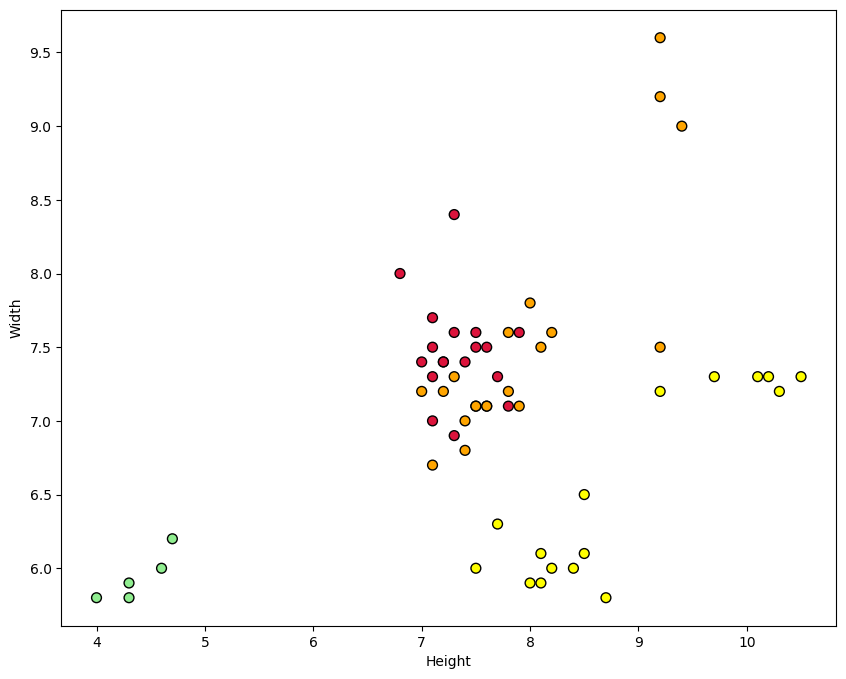

In [42]:
fig, axes = plt.subplots()
fig.set_size_inches(10, 8)

axes.scatter(fruits.height, fruits.width, c = clrs, edgecolor = "black", s = 50)
axes.set_xlabel("Height")
axes.set_ylabel("Width")

plt.show()

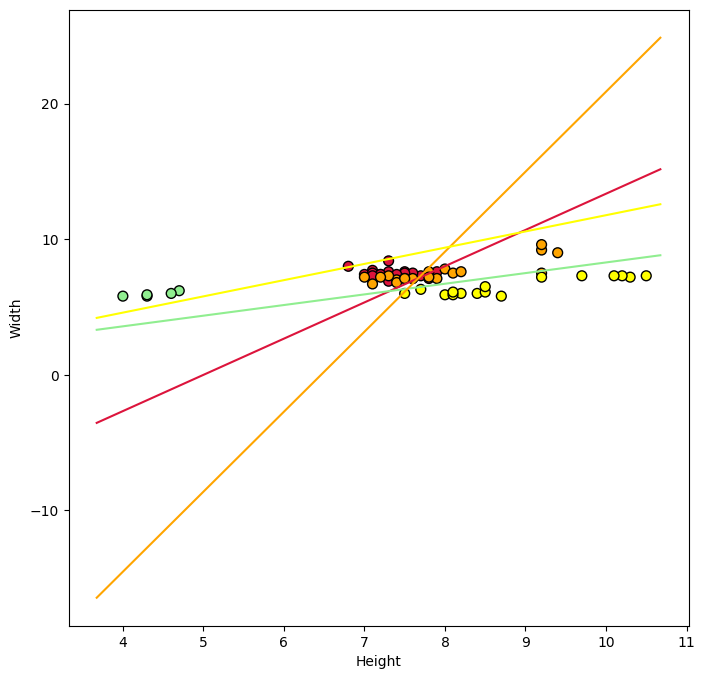

In [41]:
# With decision boundaries.
# When y_hat = 0, w1x1 + w2x2 + b_hat = 0;
# x2 = (-w1x1 - b_hat) / w2

fig, axes = plt.subplots()
fig.set_size_inches(8, 8)

axes.scatter(fruits.height, fruits.width, c = clrs, edgecolor = "black", s = 50)

_clrs = ["crimson", "lightgreen", "orange", "yellow"]
height = np.arange(axes.get_xlim()[0], axes.get_xlim()[1], step = 0.5)
for ((w1, w2), b, c) in zip(mulLinSVC.coef_, mulLinSVC.intercept_, _clrs):
    plt.plot(height, (-w1 * height - b) / w2, color = c)

axes.set_xlabel("Height")
axes.set_ylabel("Width")

plt.show()

In [47]:
# lets say that we have a fruit with width 7.5 and height 3.29
# what will be the prediction of the binary apple classifier?

# y_hat = w1x1 + w2x2 + b_hat
# y_hat = w1 * width + w2 * height + b_hat

mulLinSVC.coef_[0][0] * 7.5 + mulLinSVC.coef_[0][1] * 3.29 + mulLinSVC.intercept_[0]

0.610272312208076

In [ ]:
# Since the value > 0, it predicts its an apple.

In [60]:
# Another fruit with width 7.14 and height 10.06

mulLinSVC.coef_[0][0] * 7.14 + mulLinSVC.coef_[0][1] * 10.06 + mulLinSVC.intercept_[0]

-0.7846686476617262

In [ ]:
# Since the predicted value < 0, not an apple.

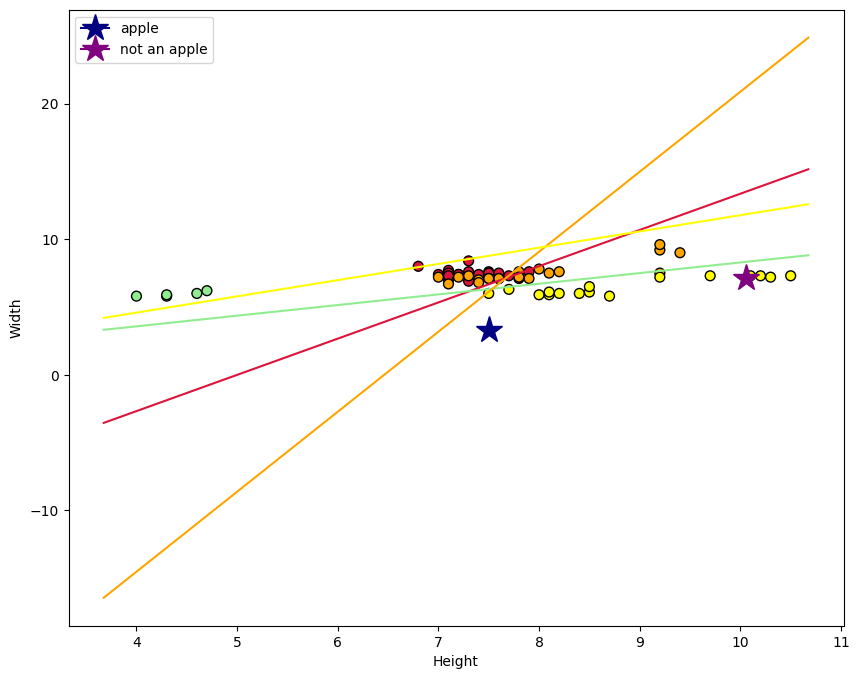

In [66]:
fig, axes = plt.subplots()
fig.set_size_inches(10, 8)

axes.scatter(fruits.height, fruits.width, c = clrs, edgecolor = "black", s = 50)
_clrs = ["crimson", "lightgreen", "orange", "yellow"]
height = np.arange(axes.get_xlim()[0], axes.get_xlim()[1], step = 0.5)
for ((w1, w2), b, c) in zip(mulLinSVC.coef_, mulLinSVC.intercept_, _clrs):
    plt.plot(height, (-w1 * height - b) / w2, color = c)
axes.plot(7.5, 3.29, color = "navy", marker = "*", ms = 20, label = "apple")
axes.plot(10.06, 7.14, color = "purple", marker = "*", ms = 20, label = "not an apple")
axes.set_xlabel("Height")
axes.set_ylabel("Width")
axes.legend()
plt.show()

plt.show()